# Tarea 2

In [1]:
from numpy import *
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Ejercicio 1

Realice un programa que encuentre todas las raíces de una función en un intervalo cerrado bajo la
suposición de que la función realiza oscilaciones y entre cada oscilación hay al menos una raíz. Ponga
en práctica esta función y encuentre todas las raíces de la siguiente función $y(x) = \cos x +\frac{6}{5}\sin^2 x$
en el intervalo $(0, 2\pi)$.

In [2]:
# Se utiliza el algoritmo por biparticion vito en clase
def raiz_bip(func, x_i, x_d, args, n_max, err = 1e-5):
    raiz = 0.5*(x_i+x_d)
    y_i, y_d = func(x_i, args), func(x_d, args)
    n = 0
    while abs(y_i-y_d)>=err and n<n_max:
        n = n+1
        y_m = func(raiz, args)
        if y_m == 0:
            break
        if y_m*y_i < 0:
            x_d = raiz
        else:
            x_i = raiz
        raiz = 0.5*(x_i+x_d)
        y_i,y_d = func(x_i, args),func(x_d, args)
        
    if n == n_max-1:
        return False, 0
    elif abs(func(raiz, args))<err:
        return True, raiz
    else:
        return False, 0

## se crea una funcion recursiva que va refinando la busqueda
def busca_raices(func, xi, xd, args, n, N):
    # Se parte el intervalo en muchos pedazos
    x = linspace(xi, xd, N)
    # Se crea un arreglo donde se iran guardando las raices
    RAICES = []
    # Se determina el error segun la particion de x que se elija
    err = min(1.0e-4, (xd-xi)/N)
    # Se realiza una busqueda de raices entre x[i] y x[i+1]
    for i in range(len(x)-1):
        # Se busca la raiz
        encont_raiz, raiz = raiz_bip(func, x[i], x[i+1], args, n, err)
        
        # Si encontro una raiz la guarda y mas en el intervalo
        if encont_raiz:
            # guarda la raiz
            RAICES.append(raiz)

            encont_raiz_inf, raices_inf = busca_raices(func, x[i], raiz-err, args, n, N)
            encont_raiz_sup, raices_sup = busca_raices(func, raiz+err, x[i+1], args, n, N)
            
            if encont_raiz_inf:
                RAICES = RAICES + raices_inf
            if encont_raiz_sup:
                RAICES = RAICES + raices_sup    

    if len(RAICES)>0:
        return True, RAICES
    else:
        return False, RAICES

# Realiza el proceso varias veces para distintas mallas para encontrar la mayor cantidad de raices
def busca_todas_las_raices(func, xi, xd, args, n=50, N=10):
    m = 5
    lens = zeros(m)
    raices = []
    for i in range(1,m+1):
        val, raices_i = busca_raices(func, xi, xd, args, n, N+i-1)
        lens[i-1] = len(raices_i)
        raices.append(raices_i)
    max_len = amax(lens)
    
    if max_len==0:
        return 0
    for i in range(m):
        if lens[i] == max_len:
            return raices[i]

Si usamos la función de prueba $y(x) = \cos(x)+1.2\sin(x^2)$ obtenemos los siguientes resultados

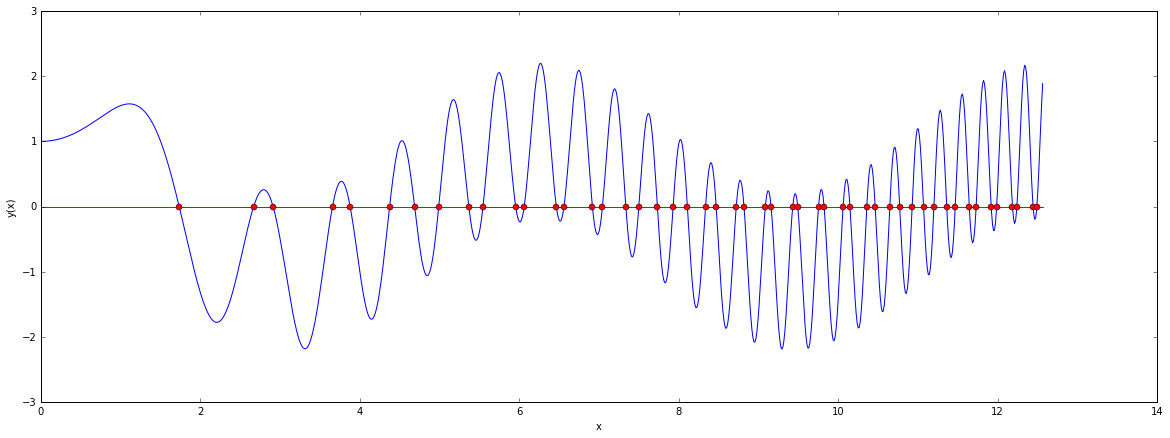

In [3]:
def func_prueba(x, args):
    return cos(args*x)+1.2*sin(x*x)
    
fig = figure(figsize=(20,7))
ax = fig.add_subplot(111)

N = 3
xi = 0
xd = 4*pi

x = linspace(xi, xd, 1000)
y = func_prueba(x,1)
plot(x, y, x, zeros_like(x))

raices = busca_todas_las_raices(func_prueba, xi, xd, 1, 100, N)
if raices==0:
    print "no hay raices"
else:
    plot(raices, zeros_like(raices), 'o')
    
ylabel("y(x)")
xlabel("x")

Como podemos ver, para este caso la función logra obtener todos los ceros de la función en el intervalo $(0,4\pi)$

## Ejercicio 2

Consideremos la siguiente función de dos variables
$$f(x,y) = 2 e^{-(x+1)^2}\left(e^{-(y+2)^2}+e^{-(y-2)^2}\right) + 6x(x^2+y^2)e^{-(x^2+y^2)}-1$$

Encontrar los puntos $(\bar x,\bar y)$ tal que $f(\bar x,\bar y)=0$.

In [4]:
# se define la funcion
def func_2(y, x):
    return 2*exp(-(x+1)**2)*(exp(-(y+2)**2)+exp(-(y-2)**2)) + 6*x*(x**2+y**2)*exp(-(x**2+y**2))-1

In [5]:
# se busca la raiz de la forma propuesta,
# es decir se toma un valor de x_0 fijo y si buscan todas las raices de f(x_0, y) como funcion de y
def busca_raiz_2D(func, x_int, y_int, Res, N):
    x = arange(x_int[0], x_int[1]+Res, Res)
    raices_x = []
    raices_y = []
    for xi in x:
        raices_temp = busca_todas_las_raices(func, y_int[0], y_int[1], xi, 50, N)
        if raices_temp!=0:
            for yi in raices_temp:
                raices_x.append(xi)
                raices_y.append(yi)
    return raices_x, raices_y

A continuación se grafican los resultados, donde se muestran los puntos los valores encontrados con el metodo propuesto, junto con una gráfica de contornos de la misma función.

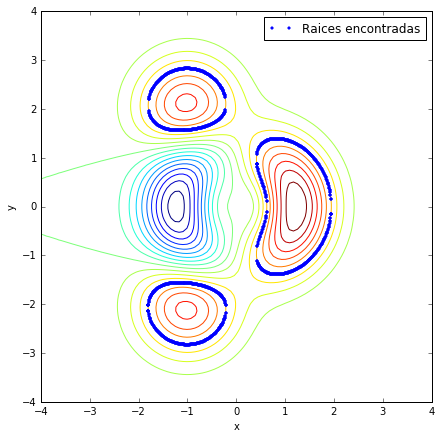

In [6]:
fig = figure(figsize=(7,7))
ax = fig.add_subplot(111)

x = linspace(-4,4,100)
y = linspace(-4,4,100)
X, Y = meshgrid(x, y)

f = func_2(Y, X)
ax.contour(X, Y, f, 20)

raices = busca_raiz_2D(func_2, [-4,4], [-4,4], 0.01, 3)
ax.plot(raices[0], raices[1], '.', markersize=5, label="Raices encontradas")
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")

Como podemos ver, los puntos se acomodan en total acuerdo con una de las equi-superficies del mapa de contorno.

## Ejercicio 3

Se tiene una pelota de masa m sobre un plano inclinado a un ángulo $\alpha$ = 15º, 30º y 45º.

In [7]:
#Se define el integrador que se va a utilizar
def rk4(ec, p_ini, x, args=0, h=0.01):
    if x[1]-x[0] <= 5*h:
        h = abs(x[1]-x[0])/100
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1): 
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h) 
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h) 
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h) 
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4) 
    else:
        for i in xrange(len(tiempos)-1): 
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args) 
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args) 
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args) 
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4) 
    return tiempos,sol

La ecuación de movimiento de la partícula es:
$$m \ddot{\vec r} = -g \hat z + F(\dot r) \hat{\dot{r}}$$

Donde $F(\dot r)$ es un modelo de la fricción a la que está sometida la partícula.

Los modelos que se van a emplear son proporcionales a la velocidad o al cuadrado de la velocidad, es decir de la forma


\begin{array}\\
F_{v}(\dot r) &=& \gamma \| \vec {\dot r}\|\\
F_{v^2}(\dot r) &=& \gamma \|\vec {\dot r}\|^2
\end{array}

In [8]:
def e_mov(r_v, t, fric=0, g=9.8, m=1):
    dx = r_v[2] 
    dy = r_v[3]
    if fric==0:
        dvx,dvy = 0, -(g/m)
    else:
        dvx = -  fric([r_v[2],r_v[3]])[0]
        dvy = -(g/m) - fric([r_v[2],r_v[3]])[1]
    return array([dx,dy,dvx,dvy])

# friccion proporcional a la velocidad
def fric_v(v,gamma=0.1): 
    f_x = gamma*v[0]
    f_y = gamma*v[1]
    return array([f_x,f_y])

# friccion proporcional al cuadrado de la verlocidad
def fric_v2(v,gamma=0.1):
    norm_v = sqrt(v[0]**2 + v[1]**2)
    f_x = gamma*norm_v*v[0]
    f_y = gamma*norm_v*v[1]
    return array([f_x,f_y])

La forma en como se van a determinar las condiciones de rebote son las siguientes:
* Cuando la partícula cumpla con estar sobre la recta de pendiente $-\tan\alpha$
* La velocidad paralela al plano se conserva mientras que la ortogonal se invierte el signo, rebota.

Para el segundo punto se tiene que resolver el sistema de ecuaciones siguiente:

\begin{array}\\
v_{R} \cdot \hat{a} &=& v \cdot \hat{a}\\
v_{R} \cdot \hat{a}_{\perp} &=& -v \cdot \hat{a}_{\perp}
\end{array}

Donde $v_{R}$ es la velocidad de rebote y $v$ la velocidad al incidir en el plano.

Resolviendo el sistema se obtiene que

\begin{equation}
     \begin{pmatrix}
         \dot{X_R}\\
         \dot{Y_R}
         \end{pmatrix}
         =
         \begin{pmatrix}
         \cos 2 \alpha \dot{X} +\sin 2 \alpha \dot{Y}\\
         \sin 2 \alpha \dot{X} -\cos 2 \alpha \dot{Y}
         \end{pmatrix}
\end{equation}

In [9]:
def evolucion(p, alpha, fric, N=100, mi_dt=0.1):
    # se cambia el angulo a radianes
    alpha_rad = pi*alpha/180.
    # se define un arreglo vacio donde se ira guardando la trayectoria
    trayectoria = zeros((N,len(p)))
    # se incluye la condicion inicial a la trayectoria
    trayectoria[0,:] = array(p)
    for i in range(N-1):
        # se resuelve la ecuacion de movimiento en un delta t
        t, sol = rk4(e_mov,trayectoria[i,:],[0,mi_dt],fric)

        # si la solucion esta por debajo de la recta
        if sol[-1,1]/sol[-1,0] < - tan(alpha_rad):
            # se refina el paso temporal para buscar donde debe de rebotar
            dt_busqueda = mi_dt/2
            # se calcula el la trayectoria desde el punto anterior dt_busqueda
            y_izq = trayectoria[i,:]
            t, sol = rk4(e_mov,trayectoria[i,:],[0,dt_busqueda],fric)
            y_med = sol[-1,:]

            # se repite el proceso hasta que se encuenta el punto de rebote
            while abs(y_izq[1]/y_izq[0] + tan(alpha_rad))>1e-5:
                # se refina el paso temporal
                dt_busqueda = dt_busqueda/2
                # se determina en que intervalo temporal ocurrio el rebote
                if (y_izq[1]/y_izq[0] + tan(alpha_rad))*(y_med[1]/y_med[0] + tan(alpha_rad)) < 0:
                    reinicio = y_izq
                else:
                    reinicio = y_med
                # se calcula la nueva trayectoria
                t, sol = rk4(e_mov,reinicio,[0,dt_busqueda], fric)

                y_izq = reinicio
                y_med = sol[-1,:]
                
            # se ponen las condiciones de rebote
            m = array([[1,0,0,0],[0,1,0,0],
                       [0,0, cos(2*alpha_rad), -sin(2*alpha_rad)],[0,0, -sin(2*alpha_rad), -cos(2*alpha_rad)]])
            
            trayectoria[i+1,:] = dot(m, y_izq)
            
        else:
            # si aun no pasa la recta donde rebota pues continua con el calculo de la trayectoria
            trayectoria[i+1,:] = sol[-1,:]
    return trayectoria

Si realizamos la simulación utilizando el modelo de fricción proporcional a la velocidad tenemos

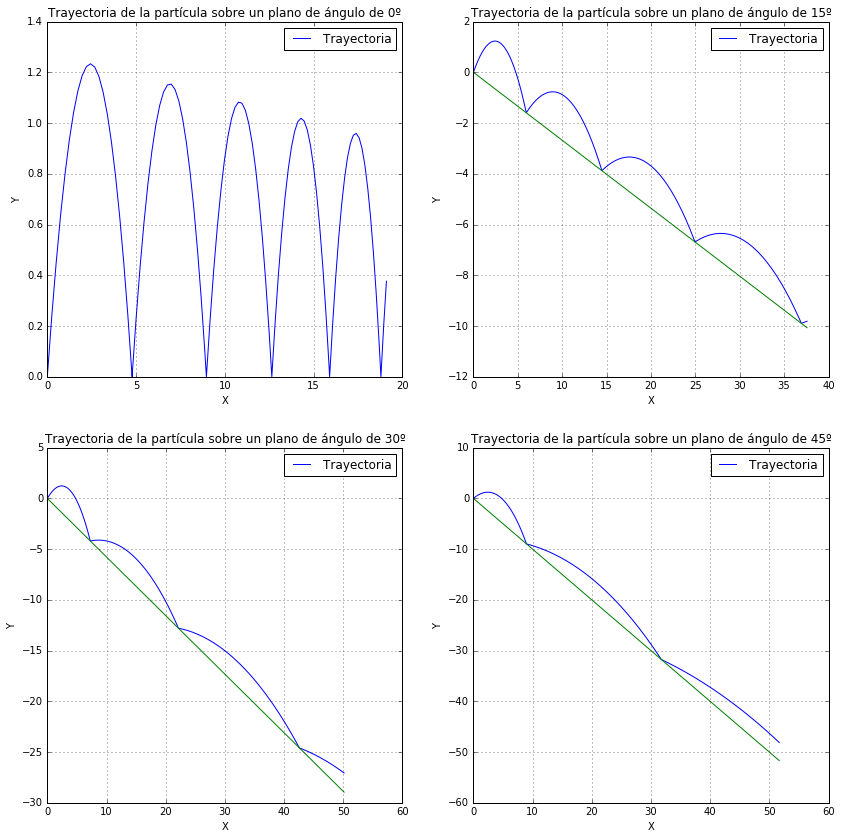

In [10]:
fig = figure(figsize=(14,14))
ax = fig.add_subplot(221)
bx = fig.add_subplot(222)
cx = fig.add_subplot(223)
dx = fig.add_subplot(224)

graphs = [ax, bx, cx, dx]

# se pone una condicion inicial
p = [0,0,5,5]
alpha = array([0,15,30,45])
alpha_rad = pi*alpha/180

for i in range(len(alpha)):
    trayectoria = evolucion(p, alpha[i], fric_v, N=100, mi_dt=0.05)
    # se grafica la solucion
    x = linspace(amin(trayectoria[:,0]), amax(trayectoria[:,0]), 100)
    # se calcula el plano donde esta la particula suponiento que en t=0, esta sobre el plano
    y_plano = trayectoria[0,1]*ones(len(x)) - tan(alpha_rad[i])*x

    graphs[i].plot(trayectoria[:,0],trayectoria[:,1], label=u"Trayectoria")
    graphs[i].plot(x, y_plano)
    graphs[i].legend()
    graphs[i].set_title(u"Trayectoria de la partícula sobre un plano de ángulo de "+str(alpha[i])+u"º")
    graphs[i].set_xlabel("X")
    graphs[i].set_ylabel("Y")
    graphs[i].grid(True)

Ahora si cambiamos el modelo de fricción proporcional al cuadrado de la velocidad tenemos

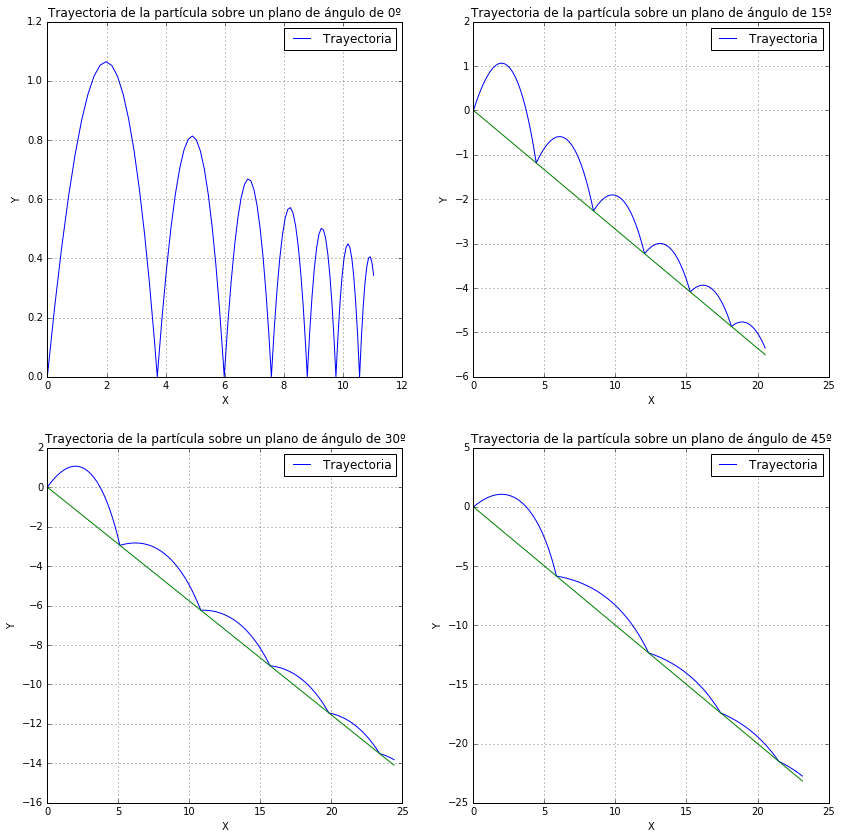

In [11]:
fig = figure(figsize=(14,14))
ax = fig.add_subplot(221)
bx = fig.add_subplot(222)
cx = fig.add_subplot(223)
dx = fig.add_subplot(224)

graphs = [ax, bx, cx, dx]

# se pone una condicion inicial
p = [0,0,5,5]
alpha = array([0,15,30,45])
alpha_rad = pi*alpha/180

for i in range(len(alpha)):
    trayectoria = evolucion(p, alpha[i], fric_v2, N=100, mi_dt=0.05)
    # se grafica la solucion
    x = linspace(amin(trayectoria[:,0]), amax(trayectoria[:,0]), 100)
    # se calcula el plano donde esta la particula suponiento que en t=0, esta sobre el plano
    y_plano = trayectoria[0,1]*ones(len(x)) - tan(alpha_rad[i])*x

    graphs[i].plot(trayectoria[:,0],trayectoria[:,1], label=u"Trayectoria")
    graphs[i].plot(x, y_plano)
    graphs[i].legend()
    graphs[i].set_title(u"Trayectoria de la partícula sobre un plano de ángulo de "+str(alpha[i])+u"º")
    graphs[i].set_xlabel("X")
    graphs[i].set_ylabel("Y")
    graphs[i].grid(True)

Si ahora tenemos que la velocidad a lo largo del eje horizontal es negativa, va hacia atrás tenemos tal que $\frac{v_{x0}}{v_{y0}} > \tan \alpha$

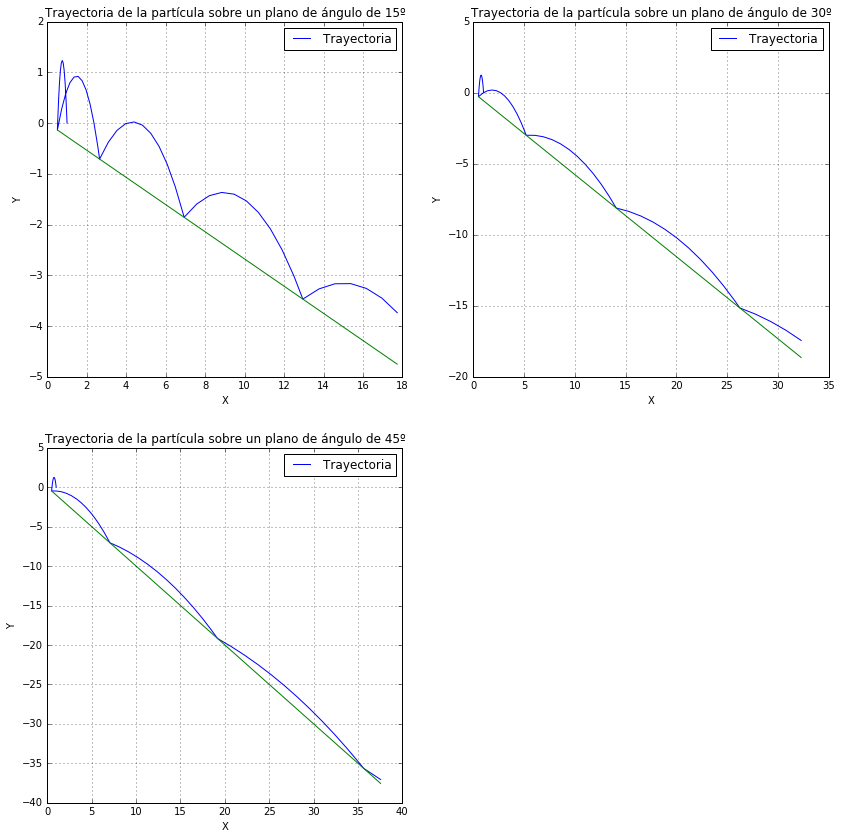

In [12]:
fig = figure(figsize=(14,14))
ax = fig.add_subplot(221)
bx = fig.add_subplot(222)
cx = fig.add_subplot(223)

graphs = [ax, bx, cx, dx]

# se pone una condicion inicial
p = [1,0,-0.5,5]
alpha = array([15,30,45])
alpha_rad = pi*alpha/180

for i in range(len(alpha)):
    trayectoria = evolucion(p, alpha[i], fric_v, N=50, mi_dt=0.1)
    # se grafica la solucion
    x = linspace(amin(trayectoria[:,0]), amax(trayectoria[:,0]), 100)
    # se calcula el plano donde esta la particula suponiento que en t=0, esta sobre el plano
    y_plano = trayectoria[0,1]*ones(len(x)) - tan(alpha_rad[i])*x

    graphs[i].plot(trayectoria[:,0],trayectoria[:,1], label=u"Trayectoria")
    graphs[i].plot(x, y_plano)
    graphs[i].legend()
    graphs[i].set_title(u"Trayectoria de la partícula sobre un plano de ángulo de "+str(alpha[i])+u"º")
    graphs[i].set_xlabel("X")
    graphs[i].set_ylabel("Y")
    graphs[i].grid(True)

Podemos notar que la partícula choca una vez contra la rampa y luego se "regresa" rebotando en dirección hacia las y negativas.